In [126]:
using Plots
using Random

In [130]:
mutable struct node
    length::Float64
    rotx::Float64
    roty::Float64
    rotz::Float64
end


mutable struct antena 
    genes::Array{node}
end

function node(l::Float64,x::Float64,y::Float64,z::Float64)
    node(l,x,y,z)
end

function antena(n::Int64)
    g = Array{node}(undef,n)
    for i in 1:n
        g[i] = node(rand()*4,rand()*180-90,0,rand()*180-90) #length,rotx,roty,rotz)
    end
    
    antena(g)
end

B = antena(2)

antena(node[node(0.42152814580529174, -10.92408648598807, 0.0, 53.91242507283269), node(3.3003482914962063, -77.34915332303672, 0.0, -40.882436202831734)])

In [291]:
function affichage(A::antena)
    X = Float64[0]
    Y = Float64[0]
    Z = Float64[0]
    for i in eachindex(A.genes)
        g = A.genes[i]
        append!(X,X[i] + g.length*sin(g.rotz*(pi/180)))
        append!(Y,Y[i] + g.length*sin(g.rotx*(pi/180)))
        append!(Z,Z[i] + g.length*cos(g.rotx*(pi/180)))
    end
    plot!(X,Y,Z,xlim = (-15,15),ylim = (-15,15), zlim = (0,10),size = (500,500))
end
B = antena(5)

antena(node[node(2.2234929710159186, -0.2905163363212466, 0.0, -29.1532659797056), node(3.8059995869417946, 42.986465127915665, 0.0, -89.6373911531377), node(0.0061166426396148665, -23.867404083314497, 0.0, 4.994430312936785), node(1.2985017115839819, -14.903898243901367, 0.0, -81.69614741220448), node(2.514129914767686, 34.03694956672716, 0.0, 47.71572355626631)])

In [264]:
function mutateN!(N::node,p::Float64)
    if rand()<p
        N.length = rand()*5
    end
    if rand()<p
        N.rotx = rand()*180-90
    end
    if rand()<p
        N.roty = rand()*180-90
    end
    if rand()<p
        N.rotz = rand()*180-90
    end
end

function mutate!(A::antena)
    for i in eachindex(A.genes)
        mutateN!(A.genes[i],1/15)
    end
    A
end

mutate! (generic function with 1 method)

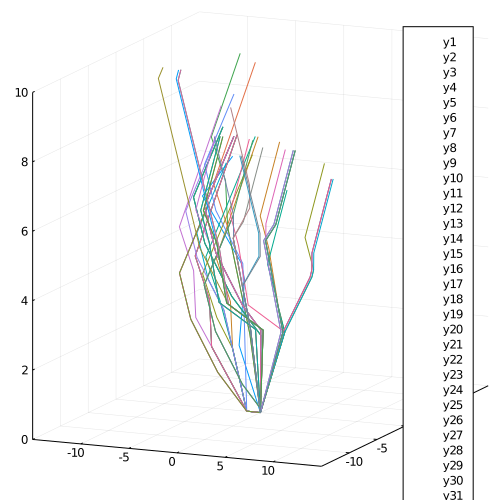

In [346]:
affichage(mutate!(B))